Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<u>**ACTIVITY NO. 5**</u> | <u>**Line and Circle Detection**</u>
**Name** | Castillo, Maria Antonette O.
**Section** | CPE32S8
**Date Performed**: | 02/20/2024
**Date Submitted**: | 02/20/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


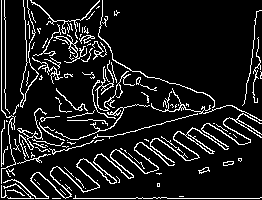

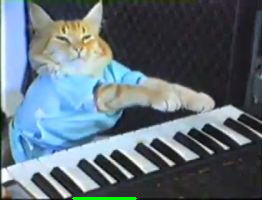

In [2]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/DATA/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?

  minLineLength = 20


2. What is the mathematical formula for Hough transform and explain how it finds lines.

  Hough Transform works by representing lines in the image space as points in the parameter space, which is known as the Hough space. For a line in the image space defined by "y = mx + b", the Hough Transform maps each point "(x, y)" in the image space to a sinusoidal curve in the parameter space defined by the parameters "m" and "b".

  The mathematical formula for the Hough Transform of a line can be represented as:

  "b = xcos(theta) + ysin(theta)"

  where:

  "b" is the perpendicular distance from the origin to the line.
  "theta" is the angle between the "x"-axis and the line segment perpendicular to the line.
  "x" and "y" are the coordinates of a point on the line.
  To find lines in the image using the Hough Transform, the algorithm iterates through each edge point detected in the edge image (after applying Canny edge detection) and calculates all possible lines that pass through that point. Each line is represented by its parameters "(theta, b)" in the parameter space. The accumulator array in the parameter space keeps track of how many edge points are associated with each line. Lines with a sufficient number of associated edge points are considered as detected lines in the image.


### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

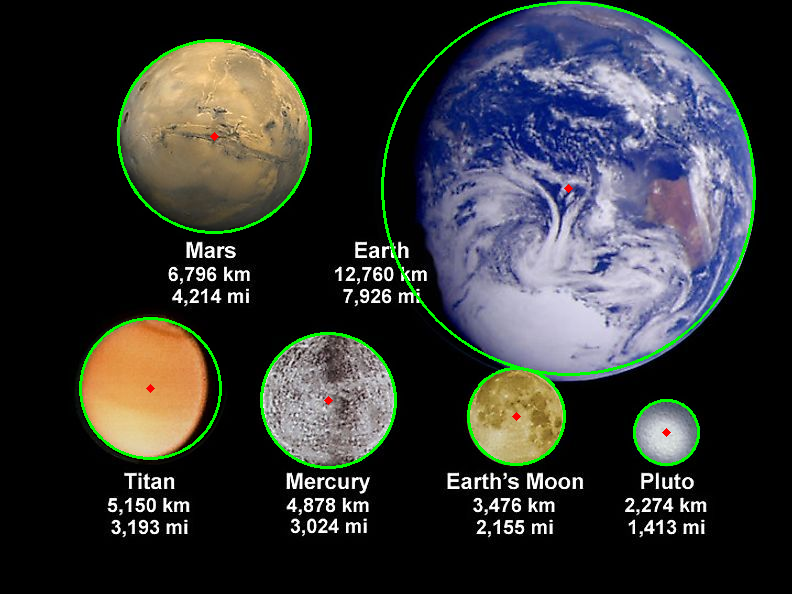

In [3]:
import cv2
import numpy as np

# Our testing value
n = 21

planets = cv2.imread('/content/drive/MyDrive/DATA/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

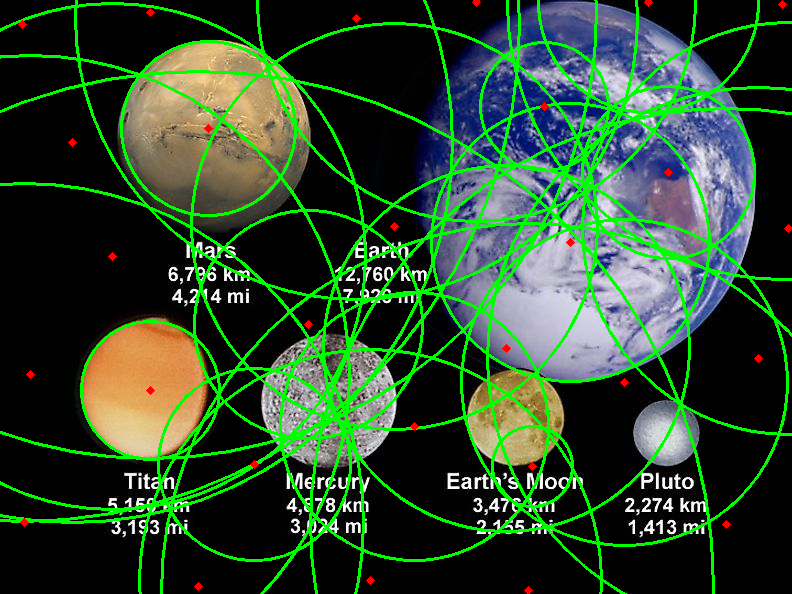

In [4]:
n = 5

planets = cv2.imread('/content/drive/MyDrive/DATA/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

Change the value to 9, **what happens to the image**?

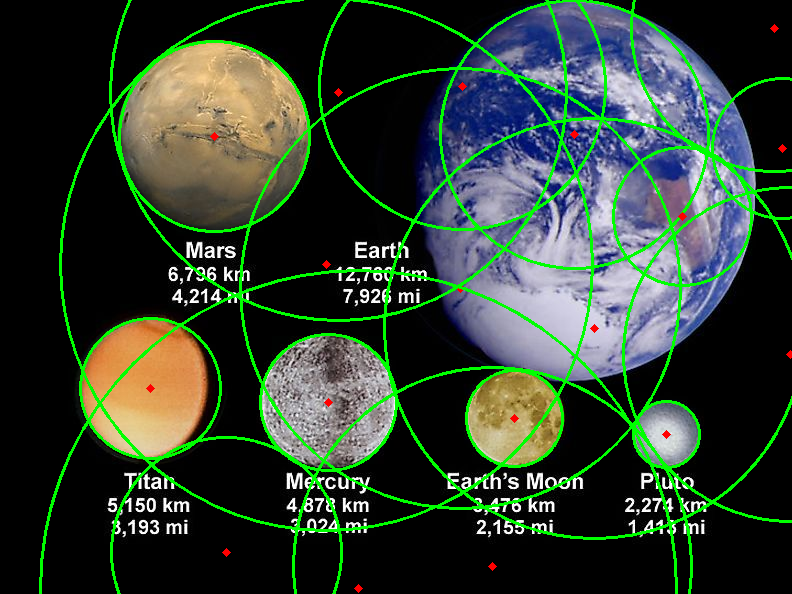

In [5]:
n = 9

planets = cv2.imread('/content/drive/MyDrive/DATA/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

Lastly, change the value to 15, **what can you say about the resulting image?**

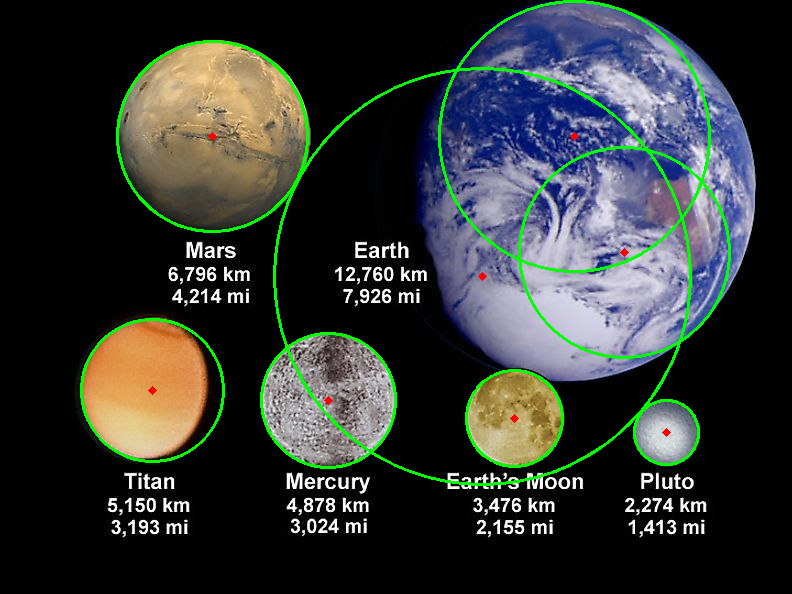

In [6]:
n = 15

planets = cv2.imread('/content/drive/MyDrive/DATA/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

The n controls the degree of blur applied to the image using the median blurring. A larger n results in a stronger blur, while smaller n is a weaker blur. Moreover, a larger value of n reduces the noise, which improves the circle detection accuracy. Meanwhile, smaller n increases the sensitivity to noise, which makes it detect more circle than the expected.








## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

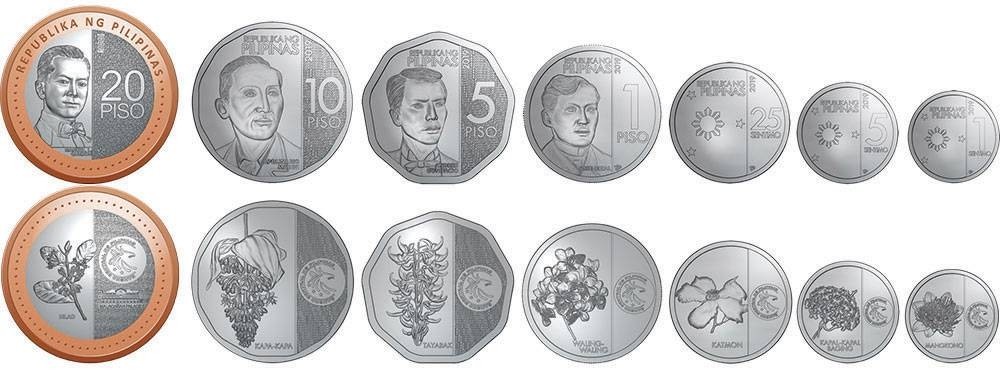

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

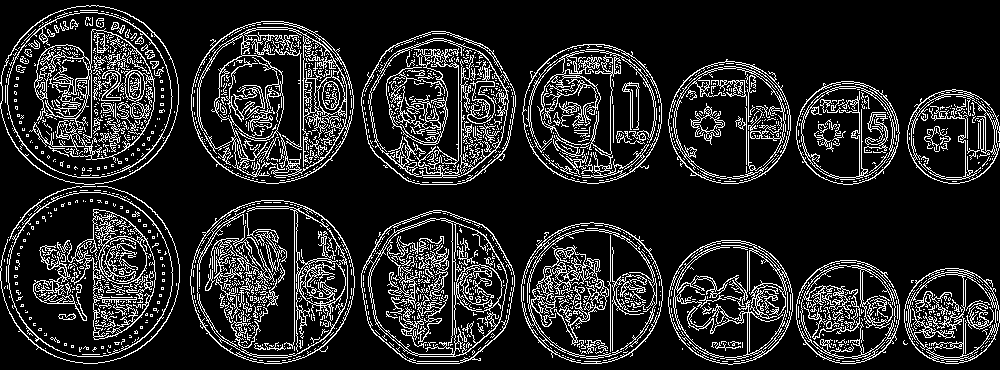

In [7]:
img = cv2.imread('/content/drive/MyDrive/DATA/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)

for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)

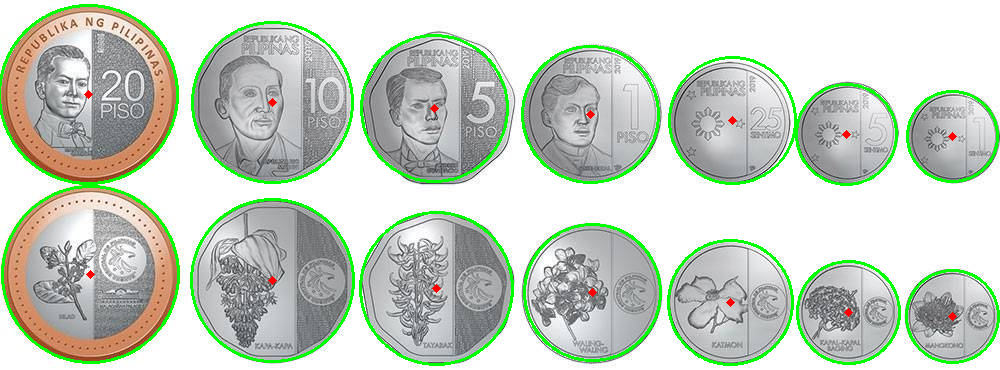


Number of circles detected: 14


In [8]:
import cv2
import numpy as np

# Our testing value
n = 25

coins = cv2.imread('/content/drive/MyDrive/DATA/coins.jpg')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

num_circles = 0  # Initialize circle count

if circles is not None:
  circles = np.uint16(np.around(circles))
  num_circles = len(circles[0])  # Count the number of circles

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(coins,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(coins,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("coins.jpg", coins)
cv2_imshow(coins)
print("\nNumber of circles detected:", num_circles)

## 5. Summary, Conclusions and Lessons Learned

This activity helped me to explore OpenCV's APIs for Hough Transform. It is implemented for line and circle detection. I was able to observe the images when the parameter n in the median blur operation was changed. I learned that  larger values of n result in a stronger blur, which reduce noise and improve detection accuracy. Meanwhile, smaller values increase sensitivity to noise, which may detect more circles than expected. Moreover, there was a task that we need to count the number of coins present in an image using either line detection or circle detection techniques.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*